<a href="https://colab.research.google.com/github/Techn08055/H-M-Fashion-Recommendation/blob/main/H%26M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.88 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/31254/3103714/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1650450650&Signature=I7GptSFiwz32maSovL21harBHPwrwbs5DZ0Yo5mzf9b8dV8UlTvX%2Fgnpi8Se%2FziNpsDOIxEy4VLkfralEjcjmioyALUmIXjwprwCGMjGwpMCR6Er2t%2BB%2FXUVNE79%2B%2BnwXI8SvARuURaWyRIM9P77sUt2AB08EwupoNuE5tqRCrXWo64MjIGBmVOW%2Bq4xdVaW3nkxpvPmKdpRYRB8Y4kXtkfNkaUiHs%2FfjegIBCxj%2BcIS3Xemhvva3DM8DlJMXoa7mB85Lh%2Bd%2BpYDBsdOceAkEOHQFSBR5BbcB30DPPdYbLI7mKTIR016TfNGCPNkZfl%2FErUS8m%2FzH24sCQsxA%2FXTMg%3D%3D&response-content-disposition=attachment%3B+filename%3Dh-and-m-personalized-fashion-recommendations.zip" -c -O 'h-and-m-personalized-fashion-recommendations.zip'

--2022-04-17 10:31:13--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/31254/3103714/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1650450650&Signature=I7GptSFiwz32maSovL21harBHPwrwbs5DZ0Yo5mzf9b8dV8UlTvX%2Fgnpi8Se%2FziNpsDOIxEy4VLkfralEjcjmioyALUmIXjwprwCGMjGwpMCR6Er2t%2BB%2FXUVNE79%2B%2BnwXI8SvARuURaWyRIM9P77sUt2AB08EwupoNuE5tqRCrXWo64MjIGBmVOW%2Bq4xdVaW3nkxpvPmKdpRYRB8Y4kXtkfNkaUiHs%2FfjegIBCxj%2BcIS3Xemhvva3DM8DlJMXoa7mB85Lh%2Bd%2BpYDBsdOceAkEOHQFSBR5BbcB30DPPdYbLI7mKTIR016TfNGCPNkZfl%2FErUS8m%2FzH24sCQsxA%2FXTMg%3D%3D&response-content-disposition=attachment%3B+filename%3Dh-and-m-personalized-fashion-recommendations.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.144, 142.251.16.128, 142.250.188.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30810293747 (29G) [application/zip]
Sav

In [ ]:
!unzip /content/h-and-m-personalized-fashion-recommendations.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/088/0889348001.jpg  
  inflating: images/088/0889370001.jpg  
  inflating: images/088/0889370002.jpg  
  inflating: images/088/0889375001.jpg  
  inflating: images/088/0889375002.jpg  
  inflating: images/088/0889379003.jpg  
  inflating: images/088/0889379006.jpg  
  inflating: images/088/0889379008.jpg  
  inflating: images/088/0889379009.jpg  
  inflating: images/088/0889379010.jpg  
  inflating: images/088/0889384001.jpg  
  inflating: images/088/0889387001.jpg  
  inflating: images/088/0889387002.jpg  
  inflating: images/088/0889392001.jpg  
  inflating: images/088/0889392002.jpg  
  inflating: images/088/0889399001.jpg  
  inflating: images/088/0889416001.jpg  
  inflating: images/088/0889416002.jpg  
  inflating: images/088/0889434001.jpg  
  inflating: images/088/0889456001.jpg  
  inflating: images/088/0889456002.jpg  
  inflating: images/088/0889456003.jpg  
  inflating: images/088/0889460001.jpg  
  infl

## **Exploratory Data Analysis** ✨✨

We have the following informations in the dataset provided...

* **images**                 - a folder of images corresponding to each article_id.

* **articles.csv**           - detailed metadata for each article_id 

* **customers.csv**          - metadata for each customer_id in dataset

* **transactions_train.csv** - the training data, consisting of the purchases each customer for each date, as well as additional information. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading The Table Data**

In [ ]:
articles_df = pd.read_csv("/content/articles.csv")
customer_df = pd.read_csv("/content/customers.csv")
transaction_df = pd.read_csv("/content/transactions_train.csv")

#### Customers 

In [ ]:
customer_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


Number of Columns in `customers.csv`

In [ ]:
print(len(customer_df.columns))

7


**Column-wise Description**

In [ ]:
for i in customer_df.columns:
  print("****"+i+"****")
  print(customer_df[i].describe())

****customer_id****
count                                               1371980
unique                                              1371980
top       00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...
freq                                                      1
Name: customer_id, dtype: object
****FN****
count    476930.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: FN, dtype: float64
****Active****
count    464404.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: Active, dtype: float64
****club_member_status****
count     1365918
unique          3
top        ACTIVE
freq      1272491
Name: club_member_status, dtype: object
****fashion_news_frequency****
count     1355971
unique          4
top          NONE
freq       877711
Name: fashion_news_frequency, dtype: object
****age****
count    1.356119e+06
mean     3.638696e+

In [ ]:
customer_df['club_member_status'].unique()

array(['ACTIVE', nan, 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

From the description it is clear that there are 7 columns in the csv file:

*  customer_id - it is unique costumer identification number

* FN - two classes, 476930 of them are 1 rest are Nan

* Active - two classes, 464404.0 of them are 1 rest are Nan

* club_member_status - 3 Classes `'ACTIVE','PRE-CREATE', 'LEFT CLUB'`, There are Nan values also

* fashion_news_frequency -2 Classes `'Regularly','Monthly`, There are empty values

* age - The current age of customer, Average value is some where around 36. There arre empty values

* postal_code - Postal code of customer, there are more than 300k unique postal codes, With one postalcode having `120303` frequency. Might be a major city


**Histogram Of Columns**

Age

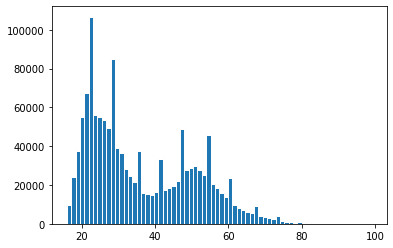

In [ ]:
#Age
plt.hist(customer_df['age'],bins=70,edgecolor='white')
plt.show()

Here, we can see many of the customers are in between age 20-25

club_member_status

In [ ]:
#club_member_status
customer_df['club_member_status'].isnull().sum()

0

Here there 6062 null values which we are changing into 'None'

In [ ]:
customer_df['club_member_status'] = customer_df['club_member_status'].replace(np.nan, 'None')

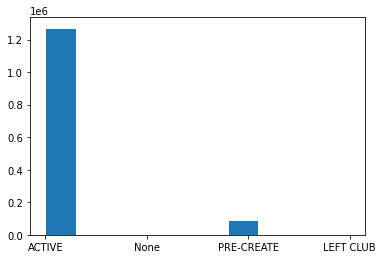

In [ ]:
# histogram club_member_status
plt.hist(customer_df['club_member_status'],edgecolor='white')
plt.show()

fashion_news_frequency 

In [ ]:
#fashion_news_frequency
customer_df['fashion_news_frequency'].isnull().sum()

16009

In [ ]:
customer_df['fashion_news_frequency'] = customer_df['fashion_news_frequency'].replace(np.nan, 'NONE')

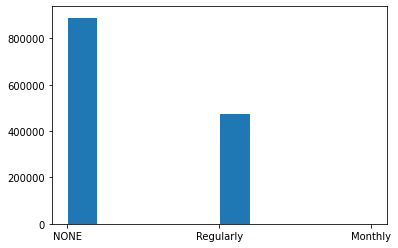

In [ ]:
# histogram fashion_news_frequency
plt.hist(customer_df['fashion_news_frequency'],edgecolor='white')
plt.show()

There are many customers without repetative news updates. We are also adding the unknown values to the NONE class

#### Articles 

In [ ]:
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


Number of Columns in `articles.csv`

In [ ]:
print(len(articles_df.columns))

25


**Column-wise Description**

In [ ]:
for i in articles_df.columns:
  print("****"+i+"****")
  print(articles_df[i].describe())

****article_id****
count    1.055420e+05
mean     6.984246e+08
std      1.284624e+08
min      1.087750e+08
25%      6.169925e+08
50%      7.022130e+08
75%      7.967030e+08
max      9.594610e+08
Name: article_id, dtype: float64
****product_code****
count    105542.000000
mean     698424.563378
std      128462.384432
min      108775.000000
25%      616992.500000
50%      702213.000000
75%      796703.000000
max      959461.000000
Name: product_code, dtype: float64
****prod_name****
count              105542
unique              45875
top       Dragonfly dress
freq                   98
Name: prod_name, dtype: object
****product_type_no****
count    105542.000000
mean        234.861875
std          75.049308
min          -1.000000
25%         252.000000
50%         259.000000
75%         272.000000
max         762.000000
Name: product_type_no, dtype: float64
****product_type_name****
count       105542
unique         131
top       Trousers
freq         11169
Name: product_type_name, dtype:

Summary of articles.csv:
There is 25 columns in articles.csv

*  `article_id` - Unique id of each article
*  `product_code` - Uniques id for product
*  `prod_name` - Names of product. contains 45875 unique product names
*  `product_type_no` - Identifier for product type
*  `product_type_name` - There are 131 unique product types
*  `product_group_name` - There are 19 unique product groups
*  `graphical_appearance_no` - identifier for graphical appearance
*  `graphical_appearance_name`- There are 30 unique graphical appearance
*  `colour_group_code` - color code id
*  `colour_group_name` - There are 50 unique color codes
*  `perceived_colour_value_id`- Id of perceived color
*  `perceived_colour_value_name` - 8 unique values
*  `perceived_colour_master_id` - Id of perceived color
*  `perceived_colour_master_name`- 20 unique values
*  `department_no` - id for department
*  `department_name` - 250 unique departments
*  `index_code` - 10 unique index code
*  `index_name` - 10 unique indexes
*  `index_group_no` - id for index group
*  `index_group_name`- 5 uniques index groups
*  `section_no` - section number id
*  `section_name` - 56  unique sections
*  `garment_group_no`- id ofgarment group
*  `garment_group_name` - 21 unique garment groups
*  `detail_desc`- detailed description of product

**Histogram of Columns**

product_type_name 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

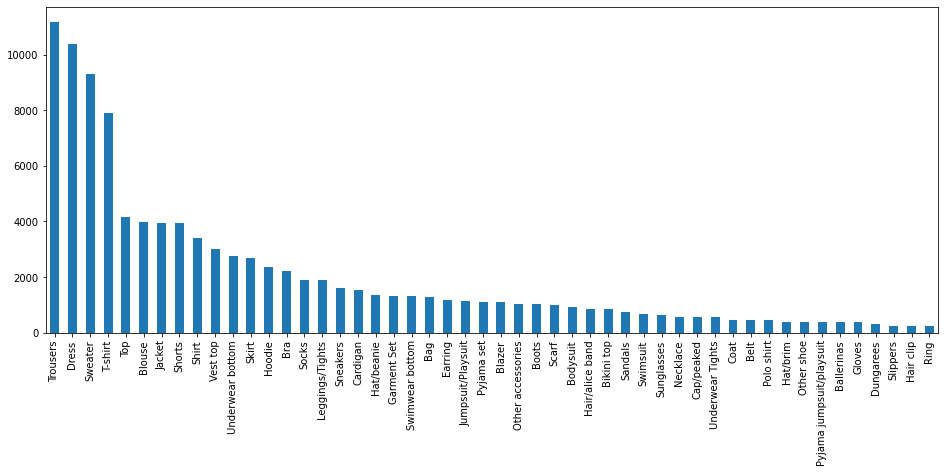

In [ ]:
plt.figure(figsize=(16,6))
articles_df['product_type_name'].value_counts(sort=True)[:50].plot.bar(rot=0)
plt.xticks(rotation=90)

product_group_name

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

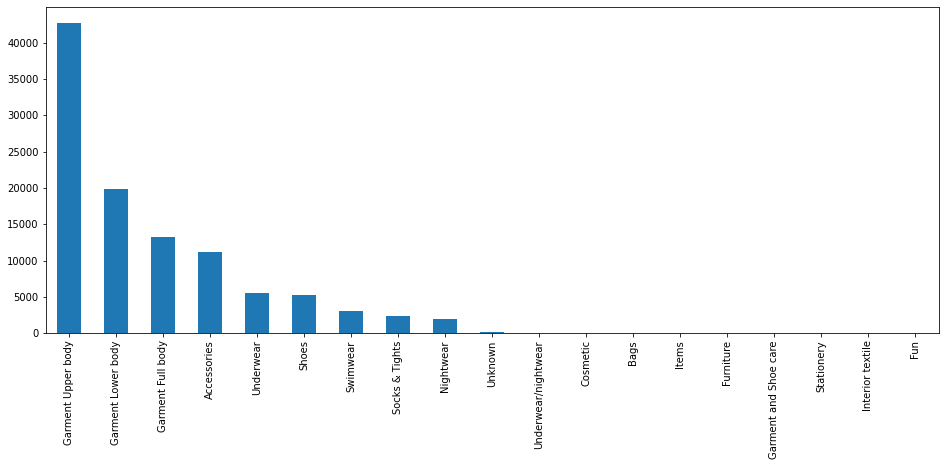

In [ ]:
plt.figure(figsize=(16,6))
articles_df['product_group_name'].value_counts(sort=True).plot.bar(rot=0)
plt.xticks(rotation=90)

index_name

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

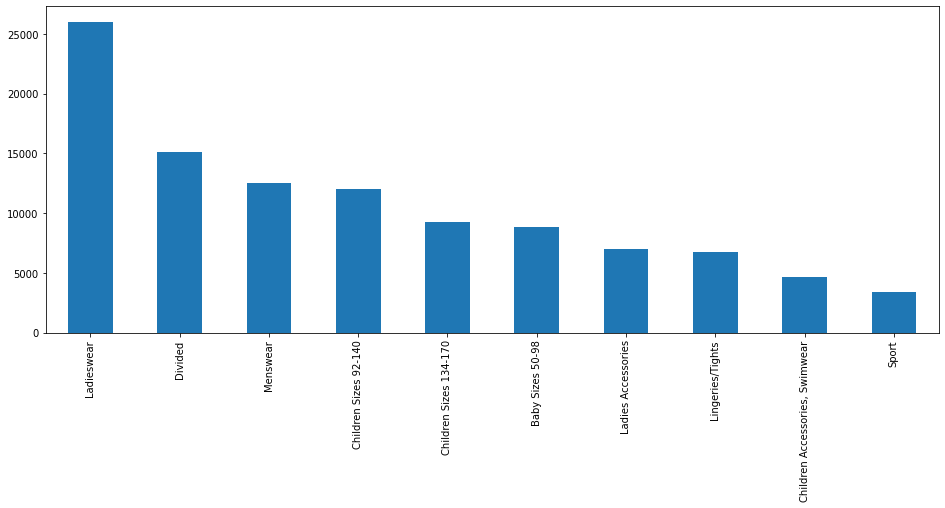

In [ ]:
plt.figure(figsize=(16,6))
articles_df['index_name'].value_counts(sort=True).plot.bar(rot=0)
plt.xticks(rotation=90)

garment_group_name

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

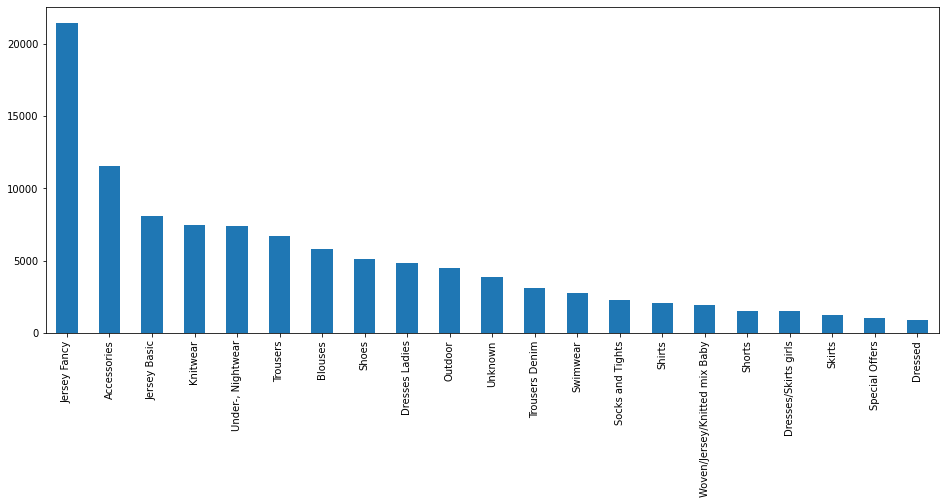

In [ ]:
plt.figure(figsize=(16,6))
articles_df['garment_group_name'].value_counts(sort=True).plot.bar(rot=0)
plt.xticks(rotation=90)

index_group_name

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

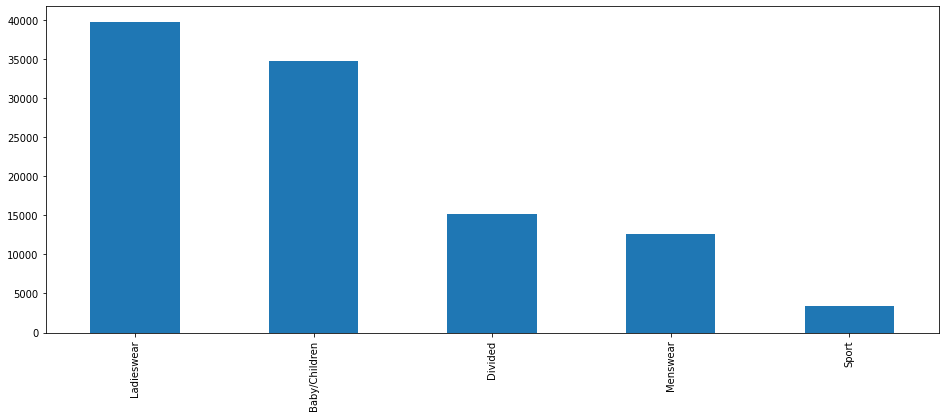

In [ ]:
plt.figure(figsize=(16,6))
articles_df['index_group_name'].value_counts(sort=True).plot.bar(rot=0)
plt.xticks(rotation=90)

section_name

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]), <a list of 56 Text major ticklabel objects>)

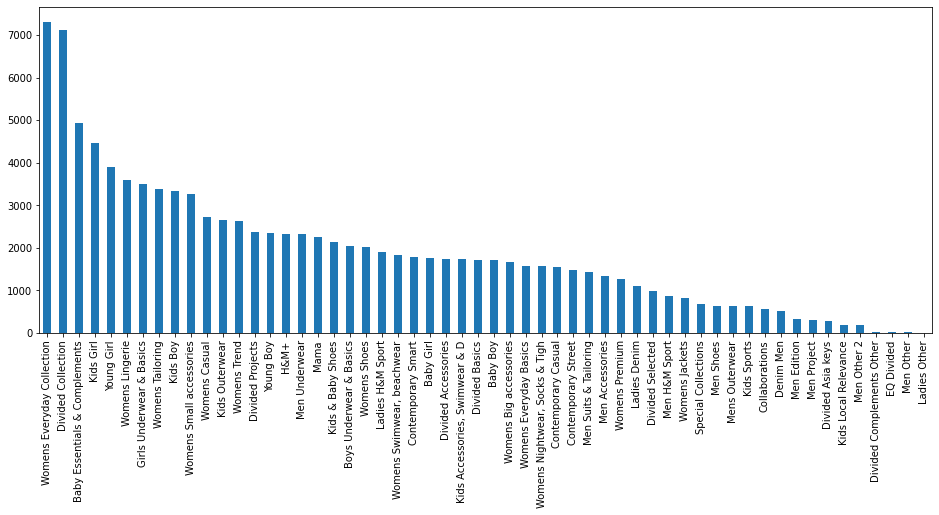

In [ ]:
plt.figure(figsize = (16,6))
articles_df['section_name'].value_counts(sort=True).plot.bar(rot=0)
plt.xticks(rotation=90)

Top 50 `prod_name`

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

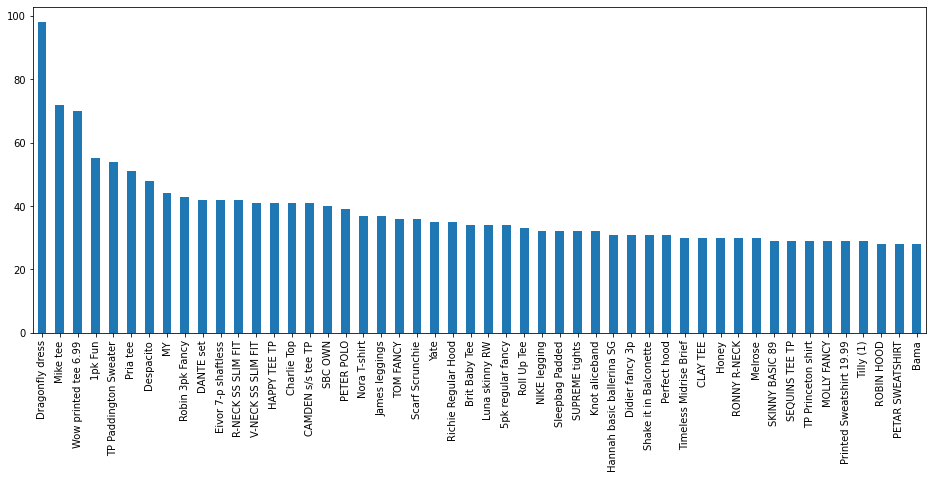

In [ ]:
plt.figure(figsize = (16,6))
articles_df['prod_name'].value_counts(sort=True)[:50].plot.bar(rot=0)
plt.xticks(rotation=90)

graphical_appearance_name

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

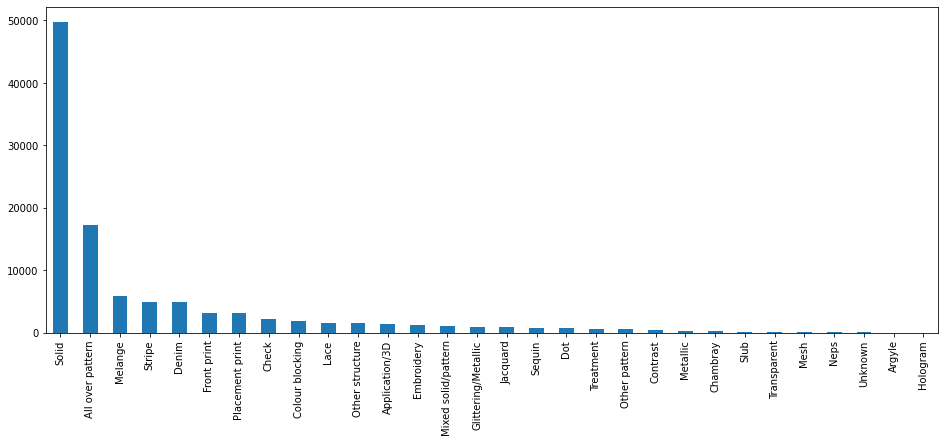

In [ ]:
plt.figure(figsize = (16,6))
articles_df['graphical_appearance_name'].value_counts(sort=True).plot.bar(rot=0)
plt.xticks(rotation=90)

colour_group_name

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

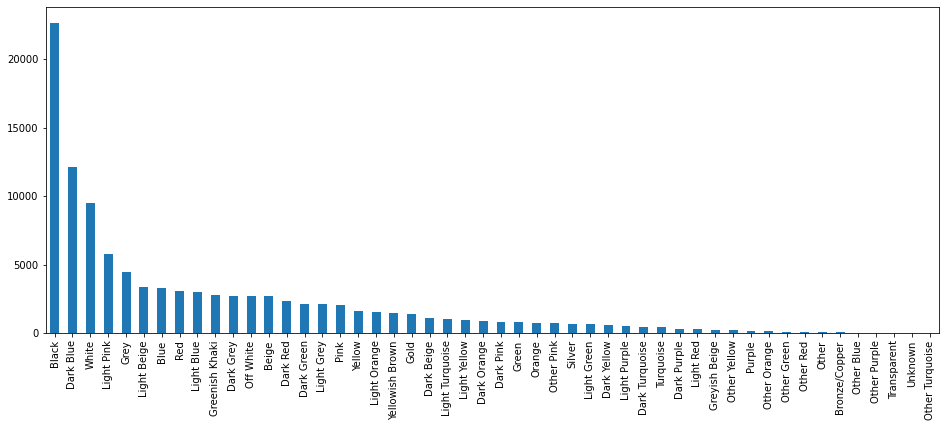

In [ ]:
plt.figure(figsize = (16,6))
articles_df['colour_group_name'].value_counts(sort=True).plot.bar(rot=0)
plt.xticks(rotation=90)

perceived_colour_value_name

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

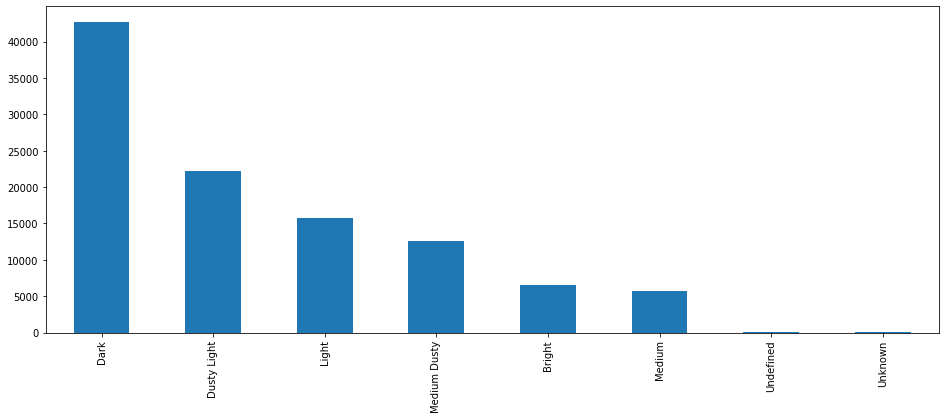

In [ ]:
plt.figure(figsize = (16,6))
articles_df['perceived_colour_value_name'].value_counts(sort=True).plot.bar(rot=0)
plt.xticks(rotation=90)

perceived_colour_master_name

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

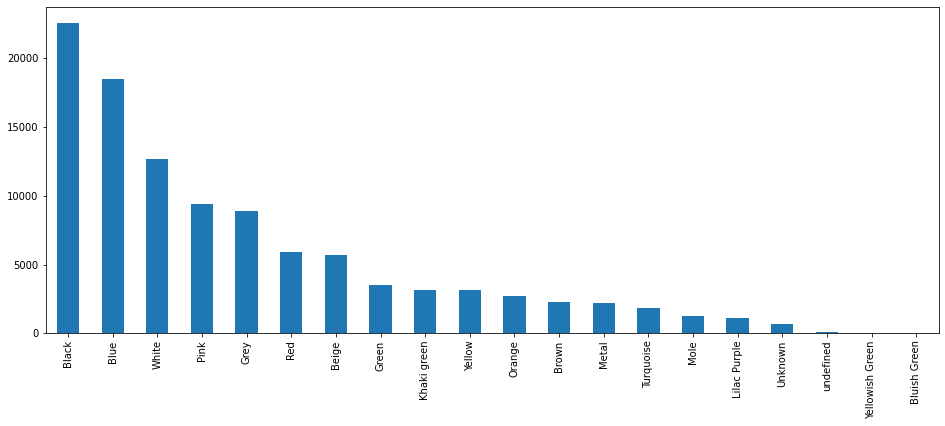

In [ ]:
plt.figure(figsize = (16,6))
articles_df['perceived_colour_master_name'].value_counts(sort=True).plot.bar(rot=0)
plt.xticks(rotation=90)

department_name

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

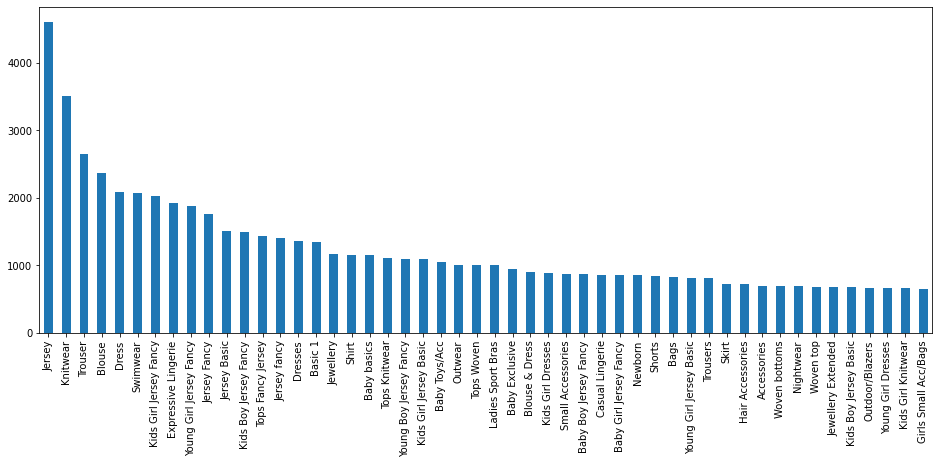

In [ ]:
plt.figure(figsize = (16,6))
articles_df['department_name'].value_counts(sort=True)[:50].plot.bar(rot=0)
plt.xticks(rotation=90)

**index_name & index_group_name**

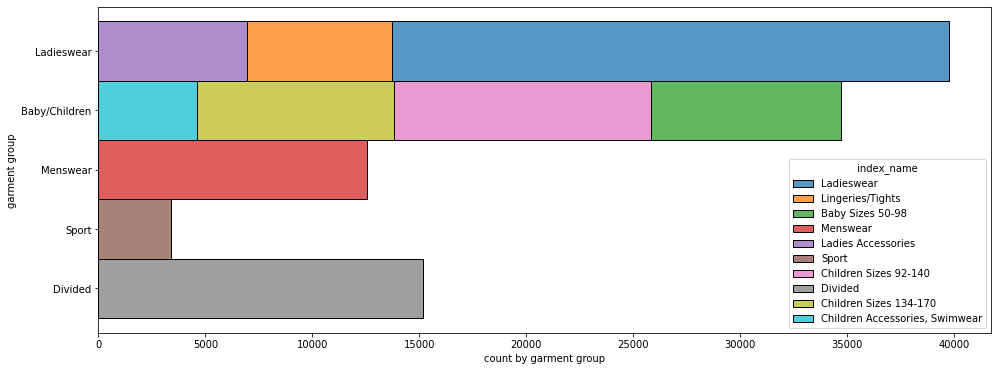

In [ ]:
plt.figure(figsize = (16,6))
sns.histplot(data=articles_df, y="index_group_name", hue="index_name", multiple="stack" )
plt.xlabel('count by garment group')
plt.ylabel('garment group')
plt.show()

In [ ]:
articles_df.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name   product_type_name
Accessories          Accessories set         7
                     Alice band              6
                     Baby Bib                3
                     Bag                  1280
                     Beanie                 56
                                          ... 
Underwear            Underwear corset        7
                     Underwear set          47
Underwear/nightwear  Sleep Bag               6
                     Sleeping sack          48
Unknown              Unknown               121
Name: article_id, Length: 132, dtype: int64

#### Transactions 

In [ ]:
transaction_df

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


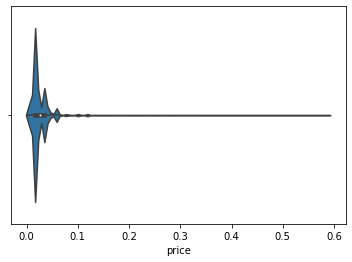

In [ ]:
sns.violinplot(x=transaction_df["price"])

You can notice large numberof outliers in the dataset price


Channelwise Price...

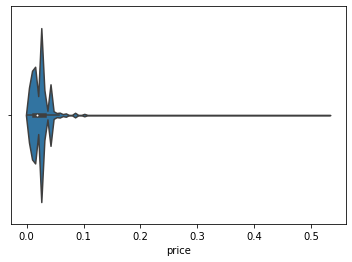

In [ ]:
sns.violinplot(x=transaction_df.loc[transaction_df["sales_channel_id"]==1].price)

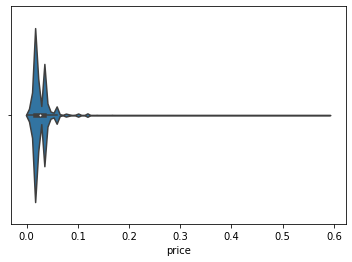

In [ ]:
sns.violinplot(x=transaction_df.loc[transaction_df["sales_channel_id"]==2].price)

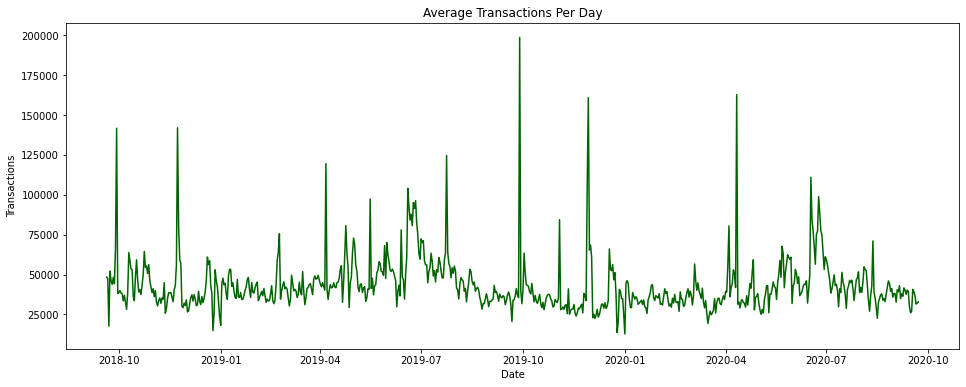

In [ ]:
df = transaction_df.groupby(["t_dat"])["article_id"].count().reset_index()
df["t_dat"] = df["t_dat"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df.columns = ["Date", "Transactions"]
fig, ax = plt.subplots(1, 1, figsize=(16,6))
plt.plot(df["Date"], df["Transactions"], color="Darkgreen")
plt.xlabel("Date")
plt.ylabel("Transactions")
plt.title("Average Transactions Per Day")
plt.show()

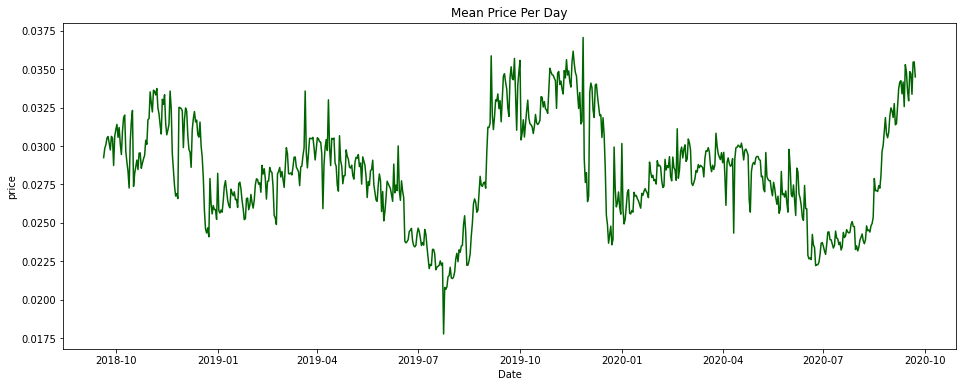

In [ ]:
df = transaction_df.groupby(["t_dat"])["price"].mean().reset_index()
df["t_dat"] = df["t_dat"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df.columns = ["Date", "price"]
fig, ax = plt.subplots(1, 1, figsize=(16,6))
plt.plot(df["Date"], df["price"], color="Darkgreen")
plt.xlabel("Date")
plt.ylabel("price")
plt.title("Mean Price Per Day")
plt.show()

#### Article Decription

Article Description is set sentences that describes particular article_id. Since these are words it needs some preprocessing like stemming & removing stop words.

In [ ]:
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra underwired, moulded, li..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra underwired, moulded, li..."


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
articles_df['detail_desc']=articles_df['detail_desc'].fillna("Cannot Find Description")
stop_words = stopwords.words('english')
articles_df['detail_desc'] = articles_df['detail_desc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
for i in articles_df['detail_desc']:
  ajj = []
  for x in i.split():
   ajj.append(''.join(SnowballStemmer("english").stem(x)))
  i=' '.join(ajj)

In [ ]:
articles_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra underwired, moulded, li..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra underwired, moulded, li..."


In [ ]:
from wordcloud import WordCloud

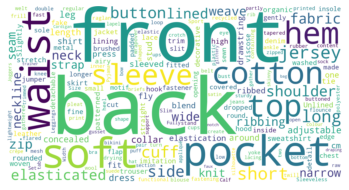

In [ ]:
text1 = " ".join(title for title in articles_df.detail_desc)
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text1)

plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()